In [7]:
import scanpy as sc
import sys
import pandas as pd

In [9]:
import numpy as np

In [2]:
adata=sc.read_h5ad('result/Hematopoiesis-All/Hematopoiesis-All_adata.h5ad')

In [3]:
adata.shape

(63882, 571400)

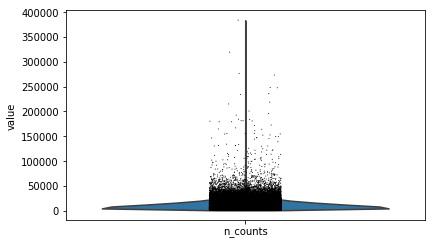

In [6]:
adata.obs['n_counts'] = adata.X.sum(axis=1)
sc.pl.violin(adata, 'n_counts')

In [3]:
sc.pp.filter_cells(adata, min_genes=10000)
sc.pp.filter_genes(adata, min_cells=1000)

In [ ]:
# filter cells to 

In [4]:
adata.shape

(12888, 46180)

In [12]:
adata.obs_keys

<bound method AnnData.obs_keys of AnnData object with n_obs × n_vars = 12888 × 46180 
    obs: 'UMAP1', 'UMAP2', 'Clusters', 'Group', 'depth', 'FRIP', 'Barcodes', 'Internal_Name', 'clusters', 'n_genes'
    var: 'n_cells'
    uns: 'rank_genes_groups'>

In [ ]:
from plot import plot_embedding, plot_clustercounts
cluster_anno=pd.read_csv('data/Hematopoiesis-All/Hematopoiesis-All_cluter.txt', sep='\t', header=None, index_col=0)
cluster_anno=cluster_anno[1].to_dict()


In [17]:
adata.write('result/Hematopoiesis-All/Hematopoiesis-All_adata_f.h5ad')

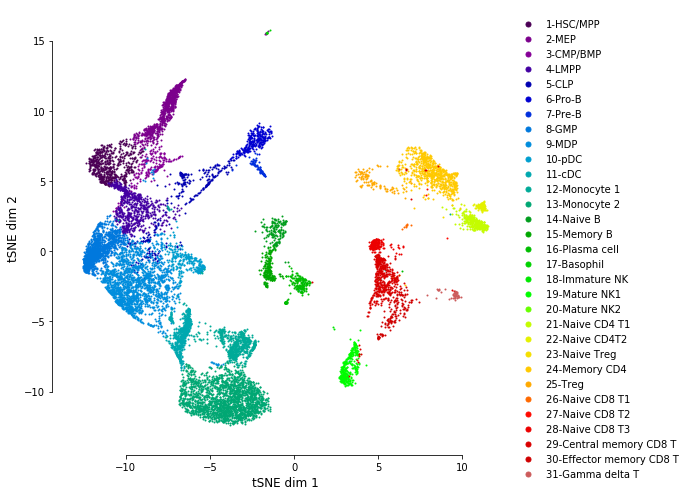

In [13]:
plot_embedding(np.array(adata.obs[['UMAP1','UMAP2']]), adata.obs['clusters'], classes=cluster_anno.values(),
               cmap='nipy_spectral', figsize=(8,8),markersize=1)

In [15]:
sys.getsizeof(adata)

34101135

In [14]:
from scipy.io import mmwrite
from scipy.sparse import csr_matrix
import numpy as np
path='data/Hematopoiesis-All/data_filtered/'
mmwrite(path+'/count.mtx', csr_matrix(adata.X.T, dtype=int))
np.savetxt(path+'/barcodes.txt',adata.obs_names,fmt="%s")
np.savetxt(path+'/peaks.txt',adata.var_names,fmt="%s")

In [15]:
def modi_peak(infile, outfile, inft, outft):
    # ':-': chr:start-end
    # '__' or '_': chr_start_end
    with open(infile) as input, open(outfile,'w') as output:
        for line in input:
            chr = line.split(inft[0])[0]
            if inft[0]==inft[1]:
                s, e = line.split(inft[0])[1:3]
            else:
                s, e = line.split(inft[0])[1].split(inft[1])
            output.write(chr+outft[0]+s+outft[-1]+e)

In [16]:
modi_peak('data/Hematopoiesis-All/data_filtered/peaks.txt', 
          'data/Hematopoiesis-All/data_filtered/peaks2.txt', 
          '__', ':-')

In [12]:
adata.obs.head()

,UMAP1,UMAP2,Clusters,Group,depth,FRIP,Barcodes,Internal_Name,clusters
Group_Barcode,,,,,,,,,
Bone_Marrow_Rep1#CAAGAAAGTCAAGACG-1,-2.419656,7.603472,Cluster6,Bone_Marrow_Rep1,29301,0.347190,CAAGAAAGTCAAGACG-1,SUHealthy_BM_B1_50,nan
Bone_Marrow_Rep1#AATGCCATCGCACAAT-1,5.676727,-9.210454,Cluster20,Bone_Marrow_Rep1,7534,0.290948,AATGCCATCGCACAAT-1,SUHealthy_BM_B1_51,nan
Bone_Marrow_Rep1#AAAGGGCAGTACCCAT-1,-7.153399,-5.512960,Cluster11,Bone_Marrow_Rep1,29608,0.449186,AAAGGGCAGTACCCAT-1,SUHealthy_BM_B1_52,nan
Bone_Marrow_Rep1#CACAACATCGTGGGTC-1,-8.475636,-5.377475,Cluster9,Bone_Marrow_Rep1,16810,0.498632,CACAACATCGTGGGTC-1,SUHealthy_BM_B1_53,nan
Bone_Marrow_Rep1#TCCATCGGTTGGTAAA-1,8.297910,-3.170289,Cluster31,Bone_Marrow_Rep1,14890,0.333277,TCCATCGGTTGGTAAA-1,SUHealthy_BM_B1_54,nan


In [11]:
cluster_counts=adata['Clusters'].value_counts()

KeyError: 'Clusters'